In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
df = pd.read_excel('education_data.xlsx')

In [50]:
df

,StudentID,Name,Age,Gender,Course,StartDate,EndDate,Marks,State,PlacementStatus,MonthlyEarnings
0,1,Apu Naiya,19,M,Certificate in Professional and Future Skills ...,2023-04-20,2023-08-10,73,West Bengal,Placed,4000
1,2,Mrityunjoy Naskar,21,M,Certificate in Professional and Future Skills ...,2023-04-20,2023-08-10,69,West Bengal,Placed,4000
2,3,SUPARNA HALDER,22,F,Certificate in Professional and Future Skills ...,2023-04-20,2023-08-10,75,West Bengal,Placed,4000
3,4,PARVEJ SK,23,M,Certificate in English Communication and IT Fu...,2023-10-11,2024-02-15,80,West Bengal,Placed,5000
4,5,DIPANKAR HAIT,22,M,Certificate in English Communication and IT Fu...,2023-10-11,2024-02-15,74,West Bengal,Placed,6000
...,...,...,...,...,...,...,...,...,...,...,...
39851,39852,Aditi Baidya,21,F,Certificate in Customer Sales and Service,2024-09-02,2025-01-13,0,West Bengal,Placed,6000
39852,39853,Tithi Roy,26,F,Certificate in Customer Sales and Service,2024-09-02,2025-01-13,0,West Bengal,Placed,6000
39853,39854,RIMI KHATUN,19,F,Certificate in Customer Sales and Service,2024-09-02,2025-01-13,0,West Bengal,Not Placed,8000
39854,39855,SUJAUDDIN AHAMED,21,M,Certificate in Customer Sales and Service,2024-09-02,2025-01-13,0,West Bengal,Not Placed,7800


In [51]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 StudentID          0
Name               0
Age                0
Gender             0
Course             0
StartDate          0
EndDate            0
Marks              0
State              0
PlacementStatus    0
MonthlyEarnings    0
dtype: int64


In [52]:
print("\nSummary statistics:\n", df.describe(include='all'))


Summary statistics:
            StudentID         Name           Age Gender  \
count   39856.000000        39856  39856.000000  39856   
unique           NaN        36643           NaN      3   
top              NaN  Neha Kumari           NaN      F   
freq             NaN           23           NaN  20813   
mean    19928.500000          NaN     22.492849    NaN   
min         1.000000          NaN     18.000000    NaN   
25%      9964.750000          NaN     20.000000    NaN   
50%     19928.500000          NaN     22.000000    NaN   
75%     29892.250000          NaN     25.000000    NaN   
max     39856.000000          NaN     27.000000    NaN   
std     11505.580501          NaN      2.869223    NaN   

                                             Course  \
count                                         39856   
unique                                           57   
top     Certificate in English Communication and IT   
freq                                           8656   
mean  

In [53]:
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])

In [54]:
df['CourseDuration'] = (df['EndDate'] - df['StartDate']).dt.days
df.head()

,StudentID,Name,Age,Gender,Course,StartDate,EndDate,Marks,State,PlacementStatus,MonthlyEarnings,CourseDuration
0,1,Apu Naiya,19,M,Certificate in Professional and Future Skills ...,2023-04-20,2023-08-10,73,West Bengal,Placed,4000,112
1,2,Mrityunjoy Naskar,21,M,Certificate in Professional and Future Skills ...,2023-04-20,2023-08-10,69,West Bengal,Placed,4000,112
2,3,SUPARNA HALDER,22,F,Certificate in Professional and Future Skills ...,2023-04-20,2023-08-10,75,West Bengal,Placed,4000,112
3,4,PARVEJ SK,23,M,Certificate in English Communication and IT Fu...,2023-10-11,2024-02-15,80,West Bengal,Placed,5000,127
4,5,DIPANKAR HAIT,22,M,Certificate in English Communication and IT Fu...,2023-10-11,2024-02-15,74,West Bengal,Placed,6000,127


In [55]:
# Placement rate
placement_rate = df['PlacementStatus'].value_counts(normalize=True) * 100
print("Placement Rate:\n", placement_rate)

# Average monthly earnings of placed students
average_earnings = df[df['PlacementStatus'] == 'Placed']['MonthlyEarnings'].mean()
print("\nAverage Monthly Earnings of Placed Students:", average_earnings)

# Average marks by course
average_marks_by_course = df.groupby('Course')['Marks'].mean()
print("\nAverage Marks by Course:\n", average_marks_by_course)


Placement Rate:
 PlacementStatus
Not Placed    62.452328
Placed        37.547672
Name: proportion, dtype: float64

Average Monthly Earnings of Placed Students: 9302.847444036084

Average Marks by Course:
 Course
Advance Java and Web Programming                                                         37.500000
Advanced Java Programming                                                                41.415291
Advanced Program in Digital Marketing                                                    62.892938
Advanced Program in Digital Marketing (Combo)                                            80.000000
Advanced Program in Dot Net Programming                                                  56.678571
Advanced Program in Graphic Designing                                                    72.846154
Advanced Program in Graphic Designing (Combo)                                            68.696970
Advanced Program in Hardware and Networking                                              59.647

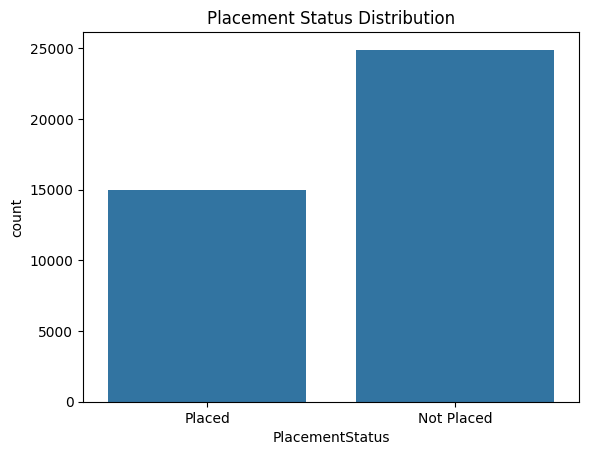

In [56]:
sns.countplot(data=df, x='PlacementStatus')
plt.title('Placement Status Distribution')
plt.show()


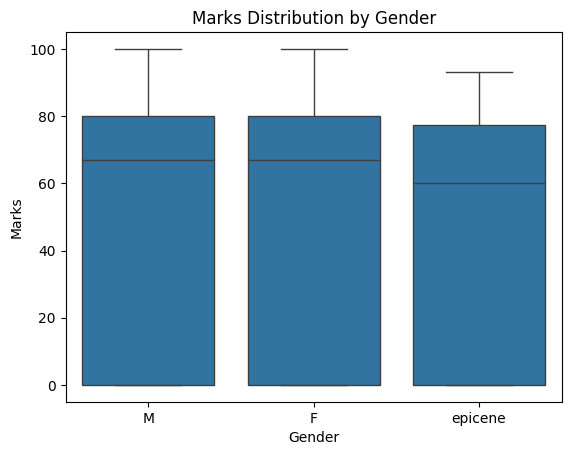

In [57]:
sns.boxplot(data=df, x='Gender', y='Marks')
plt.title('Marks Distribution by Gender')
plt.show()


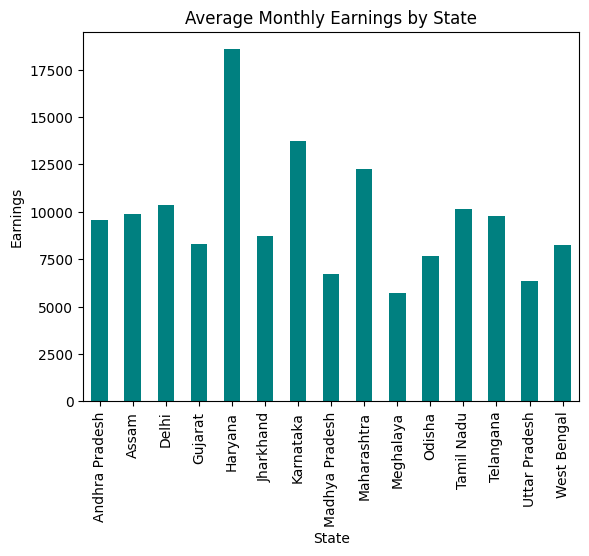

In [58]:
avg_earnings_by_state = df[df['PlacementStatus'] == 'Placed'].groupby('State')['MonthlyEarnings'].mean()
avg_earnings_by_state.plot(kind='bar', color='teal')
plt.title('Average Monthly Earnings by State')
plt.ylabel('Earnings')
plt.show()


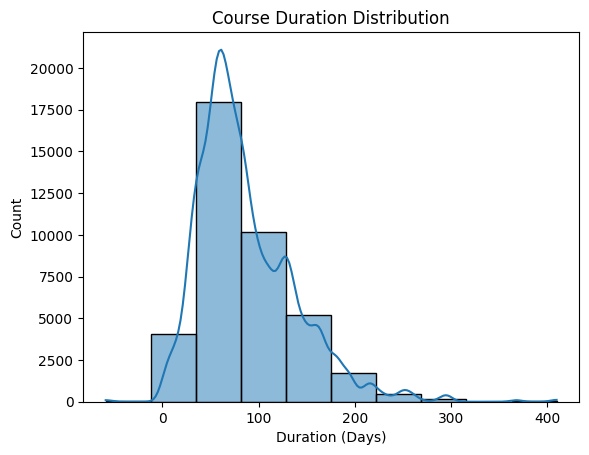

In [59]:
sns.histplot(df['CourseDuration'], bins=10, kde=True)
plt.title('Course Duration Distribution')
plt.xlabel('Duration (Days)')
plt.show()
